In [4]:
import hoi4_civ_calculator as calc
#I set this for Germany, strategy: rhineland, then go for some econ focuses, rush con 3 
# -rough est of day get, dispersed ind
#My Day 1 actually produces stuff, which represents Jan 2, 1936 (or any day you configure this for)

#general construction speed
#(must have first day) 2nd val must be cumulative
speed_mod = [(1, 1.05), (154,1.15), (272,1.25), (int(27*30.42),1.35)]
unique_spd_mod = {'civ': [(1,0), (140,.1), (210,.2), (int(29*30.42),0)], 
                  #hire advisor month 5, fire advisor month 30
                  'civ_con': [(1,0), (140,.1), (210,.2), (int(18*30.42),.3), (int(29*30.42),.2)],
                  'mil': [(1,.35), (178,.45), (210,.55), (int(18*30.42),.65)],
                  'mil_con': [(1,.35), (178,.45), (210,.55), (int(18*30.42),.85)], 
                  #many mil bonuses also apply -add them here too
                  'ref': [(1,.15), (140,.25), (int(29*30.42),.15)],
                  'inf': [(1,0), (140,.1), (int(29*30.42),0)],
                  'doc': [(1,.25), (178,.35), (210,.45)]} # these are all added to speed_mod
unique_cost_mod = {'civ': [(1,1)], # these are the total mods
                  'civ_con': [(1,0.9), (int(18*30.42),0.8)],
                  'mil': [(1,1)],
                  'mil_con': [(1,0.9), (int(18*30.42),0.8)],
                  'ref': [(1,1)],
                  'inf': [(1,1)],
                  'doc': [(1,1)]}
free_stuff = {'civ': {calc.ymd_to_day(1936,'oct',8):6, calc.ymd_to_day(1936,'dec',17):6, 
                      int(26*30.42):12, int(29*30.42):3, int(33*30.42):8}, 
              # in case of conquering or focus #Austria & czech civ guess
              #not sure about trade
              'mil': {int(15*30.42):6, int(26*30.42):7, int(29*30.42):3, int(33*30.42):5}, 
              #key is day had thing at end of day
              'ref': {},
              'inf': {calc.ymd_to_day(1937,'feb',25):{'brandenburg': 2, 'hannover': 3, 'thuringen': 4, 'franken': 3}},
              'doc': {}}
space_mod = [(1,1), (262,1.2), (int(18*30.42),1.4), (int(37*30.42),1.6)] 
#ind tech for max factories
    
con_goods = [(1,0.158), (int(15*30.42),0.118)] #1st val is first day ending with the change
#also depends on stab
daily_reports = [{'civ': 32, 'mil': 28, 'ref': 0, 'doc': 10, 'goods': 9}]

#state, inf mod, max fact, present fact
inf = {'moselland': [1.7, 10, 3],'rhineland': [1.8, 10, 5], 'brandenburg': [1.8, 12, 9],
       'wurttemberg': [1.8, 8, 6],'sachsen': [1.7, 10, 9],'hannover': [1.7, 8, 5]
       ,'thuringen': [1.6, 8, 1],'franken': [1.7, 6, 2], 'westfalen': [1.8, 8, 4],
       'hessen': [1.7, 8, 3], 'oberbayern': [1.7, 6, 3], 'niederbayern': [1.6, 6, 0],
      'niederschlesien': [1.6, 8, 1], 'oberschlesien': [1.6, 6, 0], 'ermland-masuren': [1.6, 4, 0],
      'konigsberg': [1.6, 6, 2]} 
#where is this in game files?

#duplicates will be grouped together unless there's no space left in state 
con_queue = calc.make_queue([(('civ_con', 'rhineland'),1),(('mil', 'moselland'),9),
              (('mil', 'rhineland'),6),(('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),6),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
final_day = 365*3 #runs this long

civ_con_mil =calc.calculate(daily_reports, con_queue, inf, final_day, speed_mod, unique_spd_mod,
                            unique_cost_mod, free_stuff, space_mod, con_goods)

In [5]:
con_queue2 = calc.make_queue([(('mil', 'moselland'),9),
              (('mil', 'rhineland'),7),(('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
all_mil = calc.calculate(daily_reports, con_queue2, inf, final_day, speed_mod, unique_spd_mod,
                         unique_cost_mod, free_stuff, space_mod, con_goods)

In [6]:
con_queue3 = calc.make_queue([(('inf', 'rhineland'),2),(('mil', 'wurttemberg'),3),(('civ_con', 'rhineland'),3),
              (('civ', 'rhineland'),20),(('mil', 'moselland'),9),(('mil_con','brandenburg'),4),
              (('doc','hannover'),3),(('ref','thuringen'),9),(('mil','westfalen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),
              (('mil','franken'),5)])
variety_test = calc.calculate(daily_reports, con_queue3, inf, 900, speed_mod, unique_spd_mod,
                              unique_cost_mod, free_stuff, space_mod, con_goods, True)

starting ('inf', 'rhineland')
starting ('mil', 'wurttemberg')
jan 2 1936
wurttemberg mil progress 1.40% civ 8 inf 1.80 mod 1.40 prog 100.80 today 100.80 cost 7200.0
rhineland inf progress 2.62% civ 15 inf 1.80 mod 1.05 prog 78.75 today 78.75 cost 3000.0
jan 3 1936
wurttemberg mil progress 2.80% civ 8 inf 1.80 mod 1.40 prog 201.60 today 100.80 cost 7200.0
rhineland inf progress 5.25% civ 15 inf 1.80 mod 1.05 prog 157.50 today 78.75 cost 3000.0
jan 4 1936
wurttemberg mil progress 4.20% civ 8 inf 1.80 mod 1.40 prog 302.40 today 100.80 cost 7200.0
rhineland inf progress 7.88% civ 15 inf 1.80 mod 1.05 prog 236.25 today 78.75 cost 3000.0
jan 5 1936
wurttemberg mil progress 5.60% civ 8 inf 1.80 mod 1.40 prog 403.20 today 100.80 cost 7200.0
rhineland inf progress 10.50% civ 15 inf 1.80 mod 1.05 prog 315.00 today 78.75 cost 3000.0
jan 6 1936
wurttemberg mil progress 7.00% civ 8 inf 1.80 mod 1.40 prog 504.00 today 100.80 cost 7200.0
rhineland inf progress 13.12% civ 15 inf 1.80 mod 1.05 prog 393

rhineland civ_con progress 1.81% civ 7 inf 2.00 mod 1.05 prog 147.00 today 73.50 cost 8100.0
wurttemberg mil progress 12.18% civ 15 inf 1.80 mod 1.40 prog 876.60 today 189.00 cost 7200.0
mar 22 1936
rhineland civ_con progress 2.72% civ 7 inf 2.00 mod 1.05 prog 220.50 today 73.50 cost 8100.0
wurttemberg mil progress 14.80% civ 15 inf 1.80 mod 1.40 prog 1065.60 today 189.00 cost 7200.0
mar 23 1936
rhineland civ_con progress 3.63% civ 7 inf 2.00 mod 1.05 prog 294.00 today 73.50 cost 8100.0
wurttemberg mil progress 17.43% civ 15 inf 1.80 mod 1.40 prog 1254.60 today 189.00 cost 7200.0
mar 24 1936
rhineland civ_con progress 4.54% civ 7 inf 2.00 mod 1.05 prog 367.50 today 73.50 cost 8100.0
wurttemberg mil progress 20.05% civ 15 inf 1.80 mod 1.40 prog 1443.60 today 189.00 cost 7200.0
mar 25 1936
rhineland civ_con progress 5.44% civ 7 inf 2.00 mod 1.05 prog 441.00 today 73.50 cost 8100.0
wurttemberg mil progress 22.68% civ 15 inf 1.80 mod 1.40 prog 1632.60 today 189.00 cost 7200.0
mar 26 1936
r

jun 10 1936
rhineland civ progress 35.25% civ 8 inf 2.00 mod 1.25 prog 3807.00 today 100.00 cost 10800.0
rhineland civ_con progress 29.24% civ 15 inf 2.00 mod 1.25 prog 2368.50 today 187.50 cost 8100.0
jun 11 1936
rhineland civ progress 36.18% civ 8 inf 2.00 mod 1.25 prog 3907.00 today 100.00 cost 10800.0
rhineland civ_con progress 31.56% civ 15 inf 2.00 mod 1.25 prog 2556.00 today 187.50 cost 8100.0
jun 12 1936
rhineland civ progress 37.10% civ 8 inf 2.00 mod 1.25 prog 4007.00 today 100.00 cost 10800.0
rhineland civ_con progress 33.87% civ 15 inf 2.00 mod 1.25 prog 2743.50 today 187.50 cost 8100.0
jun 13 1936
rhineland civ progress 38.03% civ 8 inf 2.00 mod 1.25 prog 4107.00 today 100.00 cost 10800.0
rhineland civ_con progress 36.19% civ 15 inf 2.00 mod 1.25 prog 2931.00 today 187.50 cost 8100.0
jun 14 1936
rhineland civ progress 38.95% civ 8 inf 2.00 mod 1.25 prog 4207.00 today 100.00 cost 10800.0
rhineland civ_con progress 38.50% civ 15 inf 2.00 mod 1.25 prog 3118.50 today 187.50 co

moselland mil progress 52.98% civ 11 inf 1.70 mod 1.70 prog 3814.80 today 158.95 cost 7200.0
rhineland civ progress 54.45% civ 15 inf 2.00 mod 1.35 prog 5881.00 today 202.50 cost 10800.0
sep 15 1936
moselland mil progress 55.19% civ 11 inf 1.70 mod 1.70 prog 3973.75 today 158.95 cost 7200.0
rhineland civ progress 56.33% civ 15 inf 2.00 mod 1.35 prog 6083.50 today 202.50 cost 10800.0
sep 16 1936
moselland mil progress 57.40% civ 11 inf 1.70 mod 1.70 prog 4132.70 today 158.95 cost 7200.0
rhineland civ progress 58.20% civ 15 inf 2.00 mod 1.35 prog 6286.00 today 202.50 cost 10800.0
sep 17 1936
moselland mil progress 59.61% civ 11 inf 1.70 mod 1.70 prog 4291.65 today 158.95 cost 7200.0
rhineland civ progress 60.08% civ 15 inf 2.00 mod 1.35 prog 6488.50 today 202.50 cost 10800.0
sep 18 1936
moselland mil progress 61.81% civ 11 inf 1.70 mod 1.70 prog 4450.60 today 158.95 cost 7200.0
rhineland civ progress 61.95% civ 15 inf 2.00 mod 1.35 prog 6691.00 today 202.50 cost 10800.0
sep 19 1936
mosel

moselland mil progress 60.99% civ 15 inf 1.70 mod 1.80 prog 4390.95 today 229.50 cost 7200.0
rhineland civ progress 97.37% civ 15 inf 2.00 mod 1.45 prog 10516.00 today 217.50 cost 10800.0
nov 26 1936
wurttemberg mil progress 22.28% civ 2 inf 1.80 mod 1.80 prog 1603.80 today 32.40 cost 7200.0
moselland mil progress 64.17% civ 15 inf 1.70 mod 1.80 prog 4620.45 today 229.50 cost 7200.0
rhineland civ progress 99.38% civ 15 inf 2.00 mod 1.45 prog 10733.50 today 217.50 cost 10800.0
nov 27 1936
report {'civ': 43, 'mil': 29, 'ref': 0, 'doc': 10, 'goods': 11}
wurttemberg mil progress 22.73% civ 2 inf 1.80 mod 1.80 prog 1636.20 today 32.40 cost 7200.0
moselland mil progress 67.36% civ 15 inf 1.70 mod 1.80 prog 4849.95 today 229.50 cost 7200.0
completed civ in rhineland
civ rhineland space: 12 used 8
starting ('civ', 'rhineland')
rhineland civ progress 1.40% civ 15 inf 2.00 mod 1.45 prog 151.00 today 217.50 cost 10800.0
nov 28 1936
wurttemberg mil progress 23.18% civ 2 inf 1.80 mod 1.80 prog 1668

rhineland civ progress 36.33% civ 15 inf 2.00 mod 1.45 prog 3923.50 today 217.50 cost 10800.0
feb 3 1937
brandenburg mil_con progress 25.20% civ 8 inf 1.80 mod 1.80 prog 907.20 today 129.60 cost 3600.0
moselland mil progress 84.11% civ 15 inf 1.70 mod 1.80 prog 6055.95 today 229.50 cost 7200.0
rhineland civ progress 38.34% civ 15 inf 2.00 mod 1.45 prog 4141.00 today 217.50 cost 10800.0
feb 4 1937
brandenburg mil_con progress 28.80% civ 8 inf 1.80 mod 1.80 prog 1036.80 today 129.60 cost 3600.0
moselland mil progress 87.30% civ 15 inf 1.70 mod 1.80 prog 6285.45 today 229.50 cost 7200.0
rhineland civ progress 40.36% civ 15 inf 2.00 mod 1.45 prog 4358.50 today 217.50 cost 10800.0
feb 5 1937
brandenburg mil_con progress 32.40% civ 8 inf 1.80 mod 1.80 prog 1166.40 today 129.60 cost 3600.0
moselland mil progress 90.49% civ 15 inf 1.70 mod 1.80 prog 6514.95 today 229.50 cost 7200.0
rhineland civ progress 42.37% civ 15 inf 2.00 mod 1.45 prog 4576.00 today 217.50 cost 10800.0
feb 6 1937
brandenb

rhineland civ progress 41.05% civ 15 inf 2.00 mod 1.45 prog 4433.50 today 217.50 cost 10800.0
mar 27 1937
report {'civ': 50, 'mil': 36, 'ref': 0, 'doc': 10, 'goods': 14}
brandenburg mil_con progress 10.80% civ 6 inf 2.00 mod 1.80 prog 388.80 today 108.00 cost 3600.0
moselland mil progress 49.86% civ 15 inf 1.70 mod 1.80 prog 3589.95 today 229.50 cost 7200.0
rhineland civ progress 43.06% civ 15 inf 2.00 mod 1.45 prog 4651.00 today 217.50 cost 10800.0
mar 28 1937
brandenburg mil_con progress 13.80% civ 6 inf 2.00 mod 1.80 prog 496.80 today 108.00 cost 3600.0
moselland mil progress 53.05% civ 15 inf 1.70 mod 1.80 prog 3819.45 today 229.50 cost 7200.0
rhineland civ progress 45.08% civ 15 inf 2.00 mod 1.45 prog 4868.50 today 217.50 cost 10800.0
mar 29 1937
brandenburg mil_con progress 16.80% civ 6 inf 2.00 mod 1.80 prog 604.80 today 108.00 cost 3600.0
moselland mil progress 56.24% civ 15 inf 1.70 mod 1.80 prog 4048.95 today 229.50 cost 7200.0
rhineland civ progress 47.09% civ 15 inf 2.00 mo

brandenburg mil_con progress 66.80% civ 2 inf 2.00 mod 1.80 prog 2404.80 today 36.00 cost 3600.0
moselland mil progress 34.74% civ 15 inf 1.70 mod 1.80 prog 2500.95 today 229.50 cost 7200.0
rhineland civ progress 59.87% civ 15 inf 2.00 mod 1.45 prog 6466.00 today 217.50 cost 10800.0
may 25 1937
brandenburg mil_con progress 67.80% civ 2 inf 2.00 mod 1.80 prog 2440.80 today 36.00 cost 3600.0
moselland mil progress 37.92% civ 15 inf 1.70 mod 1.80 prog 2730.45 today 229.50 cost 7200.0
rhineland civ progress 61.88% civ 15 inf 2.00 mod 1.45 prog 6683.50 today 217.50 cost 10800.0
may 26 1937
report {'civ': 51, 'mil': 44, 'ref': 0, 'doc': 10, 'goods': 11}
brandenburg mil_con progress 68.80% civ 2 inf 2.00 mod 1.80 prog 2476.80 today 36.00 cost 3600.0
moselland mil progress 41.11% civ 15 inf 1.70 mod 1.80 prog 2959.95 today 229.50 cost 7200.0
rhineland civ progress 63.90% civ 15 inf 2.00 mod 1.45 prog 6901.00 today 217.50 cost 10800.0
may 27 1937
brandenburg mil_con progress 69.80% civ 2 inf 2.

thuringen ref progress 32.69% civ 15 inf 2.00 mod 1.50 prog 4740.00 today 225.00 cost 14500.0
hannover doc progress 36.27% civ 15 inf 2.00 mod 1.70 prog 2321.00 today 255.00 cost 6400.0
jul 19 1937
westfalen mil progress 4.73% civ 1 inf 1.80 mod 1.90 prog 340.20 today 17.10 cost 7200.0
thuringen ref progress 34.24% civ 15 inf 2.00 mod 1.50 prog 4965.00 today 225.00 cost 14500.0
hannover doc progress 40.25% civ 15 inf 2.00 mod 1.70 prog 2576.00 today 255.00 cost 6400.0
jul 20 1937
westfalen mil progress 4.96% civ 1 inf 1.80 mod 1.90 prog 357.30 today 17.10 cost 7200.0
thuringen ref progress 35.79% civ 15 inf 2.00 mod 1.50 prog 5190.00 today 225.00 cost 14500.0
hannover doc progress 44.23% civ 15 inf 2.00 mod 1.70 prog 2831.00 today 255.00 cost 6400.0
jul 21 1937
westfalen mil progress 5.20% civ 1 inf 1.80 mod 1.90 prog 374.40 today 17.10 cost 7200.0
thuringen ref progress 37.34% civ 15 inf 2.00 mod 1.50 prog 5415.00 today 225.00 cost 14500.0
hannover doc progress 48.22% civ 15 inf 2.00 

mil westfalen space: 11 used 5
starting ('mil', 'westfalen')
westfalen mil progress 3.53% civ 15 inf 1.80 mod 1.90 prog 253.80 today 256.50 cost 7200.0
thuringen ref progress 36.66% civ 15 inf 2.00 mod 1.50 prog 5315.00 today 225.00 cost 14500.0
sep 24 1937
rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 7.09% civ 15 inf 1.80 mod 1.90 prog 510.30 today 256.50 cost 7200.0
thuringen ref progress 38.21% civ 15 inf 2.00 mod 1.50 prog 5540.00 today 225.00 cost 14500.0
sep 25 1937
rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 10.65% civ 15 inf 1.80 mod 1.90 prog 766.80 today 256.50 cost 7200.0
thuringen ref progress 39.76% civ 15 inf 2.00 mod 1.50 prog 5765.00 today 225.00 cost 14500.0
sep 26 1937
rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 14.21% civ 15 inf 1.80 mod 1.90 prog 1023.30 today 256.50

thuringen ref progress 6.48% civ 15 inf 2.00 mod 1.50 prog 940.00 today 225.00 cost 14500.0
nov 8 1937
rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 67.40% civ 15 inf 1.80 mod 1.90 prog 4852.80 today 256.50 cost 7200.0
thuringen ref progress 8.03% civ 15 inf 2.00 mod 1.50 prog 1165.00 today 225.00 cost 14500.0
nov 9 1937
rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 70.96% civ 15 inf 1.80 mod 1.90 prog 5109.30 today 256.50 cost 7200.0
thuringen ref progress 9.59% civ 15 inf 2.00 mod 1.50 prog 1390.00 today 225.00 cost 14500.0
nov 10 1937
rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 74.53% civ 15 inf 1.80 mod 1.90 prog 5365.80 today 256.50 cost 7200.0
thuringen ref progress 11.14% civ 15 inf 2.00 mod 1.50 prog 1615.00 today 225.00 cost 14500.0
nov 11 1937
rhineland civ progress 3.36% civ 0 i

rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 70.46% civ 15 inf 1.80 mod 1.90 prog 5073.30 today 256.50 cost 7200.0
thuringen ref progress 96.48% civ 15 inf 2.00 mod 1.50 prog 13990.00 today 225.00 cost 14500.0
jan 5 1938
rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 74.03% civ 15 inf 1.80 mod 1.90 prog 5329.80 today 256.50 cost 7200.0
thuringen ref progress 98.03% civ 15 inf 2.00 mod 1.50 prog 14215.00 today 225.00 cost 14500.0
jan 6 1938
rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 77.59% civ 15 inf 1.80 mod 1.90 prog 5586.30 today 256.50 cost 7200.0
thuringen ref progress 99.59% civ 15 inf 2.00 mod 1.50 prog 14440.00 today 225.00 cost 14500.0
jan 7 1938
rhineland civ progress 3.36% civ 0 inf 2.00 mod 1.45 prog 362.50 today 0.00 cost 10800.0
westfalen mil progress 81.15% civ 15 inf 1.80 m

thuringen ref progress 69.41% civ 15 inf 2.00 mod 1.50 prog 10065.00 today 225.00 cost 14500.0
feb 21 1938
rhineland civ progress 81.90% civ 15 inf 2.00 mod 1.45 prog 8845.00 today 217.50 cost 10800.0
thuringen ref progress 70.97% civ 15 inf 2.00 mod 1.50 prog 10290.00 today 225.00 cost 14500.0
feb 22 1938
rhineland civ progress 83.91% civ 15 inf 2.00 mod 1.45 prog 9062.50 today 217.50 cost 10800.0
thuringen ref progress 72.52% civ 15 inf 2.00 mod 1.50 prog 10515.00 today 225.00 cost 14500.0
feb 23 1938
rhineland civ progress 85.93% civ 15 inf 2.00 mod 1.45 prog 9280.00 today 217.50 cost 10800.0
thuringen ref progress 74.07% civ 15 inf 2.00 mod 1.50 prog 10740.00 today 225.00 cost 14500.0
feb 24 1938
rhineland civ progress 87.94% civ 15 inf 2.00 mod 1.45 prog 9497.50 today 217.50 cost 10800.0
thuringen ref progress 75.62% civ 15 inf 2.00 mod 1.50 prog 10965.00 today 225.00 cost 14500.0
feb 25 1938
rhineland civ progress 89.95% civ 15 inf 2.00 mod 1.45 prog 9715.00 today 217.50 cost 108

no space for construction in rhineland
no space for construction in rhineland
no space for construction in rhineland
no space for construction in rhineland
no space for construction in rhineland
no space for construction in rhineland
no space for construction in rhineland
no space for construction in rhineland
no space for construction in rhineland
no space for construction in rhineland
starting ('mil', 'brandenburg')
apr 21 1938
report {'civ': 64, 'mil': 60, 'ref': 4, 'doc': 13, 'goods': 15}
brandenburg mil progress 3.06% civ 11 inf 2.00 mod 2.00 prog 220.00 today 220.00 cost 7200.0
sachsen mil progress 27.03% civ 15 inf 1.70 mod 2.00 prog 1946.00 today 255.00 cost 7200.0
thuringen ref progress 64.59% civ 15 inf 2.00 mod 1.60 prog 9365.00 today 240.00 cost 14500.0
apr 22 1938
brandenburg mil progress 6.11% civ 11 inf 2.00 mod 2.00 prog 440.00 today 220.00 cost 7200.0
sachsen mil progress 30.57% civ 15 inf 1.70 mod 2.00 prog 2201.00 today 255.00 cost 7200.0
thuringen ref progress 66.24

brandenburg mil progress 73.89% civ 15 inf 2.00 mod 2.00 prog 5320.00 today 300.00 cost 7200.0
thuringen ref progress 51.07% civ 15 inf 2.00 mod 1.50 prog 7405.00 today 225.00 cost 14500.0
jun 14 1938
franken mil progress 18.06% civ 13 inf 2.00 mod 2.00 prog 1300.00 today 260.00 cost 7200.0
brandenburg mil progress 78.06% civ 15 inf 2.00 mod 2.00 prog 5620.00 today 300.00 cost 7200.0
thuringen ref progress 52.62% civ 15 inf 2.00 mod 1.50 prog 7630.00 today 225.00 cost 14500.0
jun 15 1938
franken mil progress 21.67% civ 13 inf 2.00 mod 2.00 prog 1560.00 today 260.00 cost 7200.0
brandenburg mil progress 82.22% civ 15 inf 2.00 mod 2.00 prog 5920.00 today 300.00 cost 7200.0
thuringen ref progress 54.17% civ 15 inf 2.00 mod 1.50 prog 7855.00 today 225.00 cost 14500.0
jun 16 1938
franken mil progress 25.28% civ 13 inf 2.00 mod 2.00 prog 1820.00 today 260.00 cost 7200.0
brandenburg mil progress 86.39% civ 15 inf 2.00 mod 2.00 prog 6220.00 today 300.00 cost 7200.0
thuringen ref progress 55.72%

In [7]:
from tests import variety_test_correct as vtc

day = calc.ymd_to_day(1937,'mar',5) #Program perfectly modeled my game up to this point 
#(I stopped then because I didn't want to hire Goebbels and deal with modelling the stability change)
if vtc.correct[:day+1] == variety_test[:day+1]:
    print('Test passed')
else:
    print('You broke the program!')

Test passed


In [8]:
con_queue4 = calc.make_queue([(('inf', 'moselland'),1),(('mil', 'rhineland'),7),(('mil', 'moselland'),9),
              (('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
inf_mil = calc.calculate(daily_reports, con_queue4, inf, final_day, speed_mod, unique_spd_mod,
                         unique_cost_mod, free_stuff, space_mod, con_goods)

In [9]:
con_queue5 = calc.make_queue([(('civ', 'rhineland'),1),(('mil', 'rhineland'),6),(('mil', 'moselland'),9),
              (('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
civ1_mil = calc.calculate(daily_reports, con_queue5, inf, final_day, speed_mod, unique_spd_mod,
                          unique_cost_mod, free_stuff, space_mod, con_goods)

In [10]:
con_queue7 = calc.make_queue([(('civ', 'rhineland'),3),(('mil', 'rhineland'),4),(('mil', 'moselland'),9),
              (('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
civ3_mil = calc.calculate(daily_reports, con_queue7, inf, final_day, speed_mod, unique_spd_mod,
                          unique_cost_mod, free_stuff, space_mod, con_goods)

In [11]:
con_queue6 = calc.make_queue([(('mil', 'rhineland'),7),(('mil', 'moselland'),9),
              (('mil', 'wurttemberg'),3),(('mil','westfalen'),5),
              (('mil','hessen'),5),
              (('mil','sachsen'),3),(('mil','brandenburg'),5),(('mil','hannover'),5),
              (('mil_con','sachsen'),7),(('mil_con','brandenburg'),4),(('mil_con','hannover'),1),
              (('mil','thuringen'),9),(('mil','franken'),5),(('mil','oberbayern'),4),
              (('mil','niederbayern'),7),(('mil','niederschlesien'),9),(('mil','oberschlesien'),7),
              (('mil','ermland-masuren'),4),(('mil','konigsberg'),5)])
mil_mil_con = calc.calculate(daily_reports, con_queue6, inf, final_day, speed_mod, unique_spd_mod,
                             unique_cost_mod, free_stuff, space_mod, con_goods)

In [12]:
con_queue7 = calc.make_queue([
              (('doc','hannover'),3),(('ref','thuringen'),9),(('doc','konigsberg'),5)])
test2 = calc.calculate(daily_reports, con_queue7, inf, 334, speed_mod, unique_spd_mod,
                       unique_cost_mod, free_stuff, space_mod, con_goods)

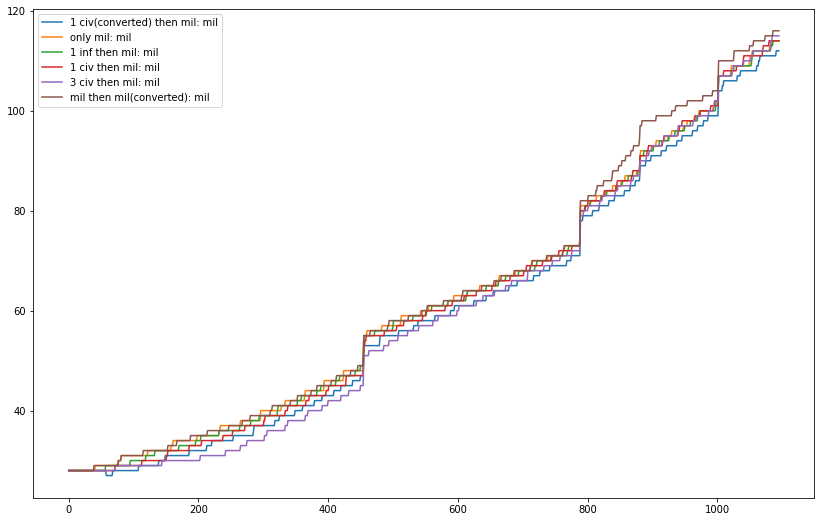

,1 civ(converted) then mil: mil,only mil: mil,1 inf then mil: mil,1 civ then mil: mil,3 civ then mil: mil,mil then mil(converted): mil
area of last 548 days,44556,45803,45628,45668,45165,46811
area of last 1096 days,65379,67801,67330,66988,65349,68836


In [13]:
calc.graph([civ_con_mil,all_mil,inf_mil,civ1_mil,civ3_mil,mil_mil_con], ['mil'],
           ['1 civ(converted) then mil', 'only mil', '1 inf then mil', '1 civ then mil', 
            '3 civ then mil','mil then mil(converted)'],
           [0.5,1])